In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bostonhoustingmlnd/housing.csv


In [2]:
bh = pd.read_csv("/kaggle/input/bostonhoustingmlnd/housing.csv")

In [3]:
bh.head()

,RM,LSTAT,PTRATIO,MEDV
0,6.575,4.98,15.3,504000.0
1,6.421,9.14,17.8,453600.0
2,7.185,4.03,17.8,728700.0
3,6.998,2.94,18.7,701400.0
4,7.147,5.33,18.7,760200.0


In [4]:
bh.isnull().sum()

RM         0
LSTAT      0
PTRATIO    0
MEDV       0
dtype: int64

In [5]:
bh.size

1956

In [6]:
bh.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [7]:
bh.corr()

,RM,LSTAT,PTRATIO,MEDV
RM,1.000000,-0.612033,-0.304559,0.697209
LSTAT,-0.612033,1.000000,0.360445,-0.760670
PTRATIO,-0.304559,0.360445,1.000000,-0.519034
MEDV,0.697209,-0.760670,-0.519034,1.000000


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
plt.figure(figsize = (15, 5))

<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

In [10]:
x1 = bh['LSTAT']
x2 = bh['RM']
x3 = bh['PTRATIO']
y1 = bh['MEDV']

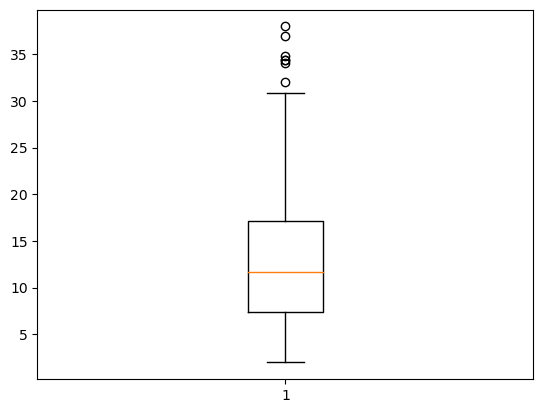

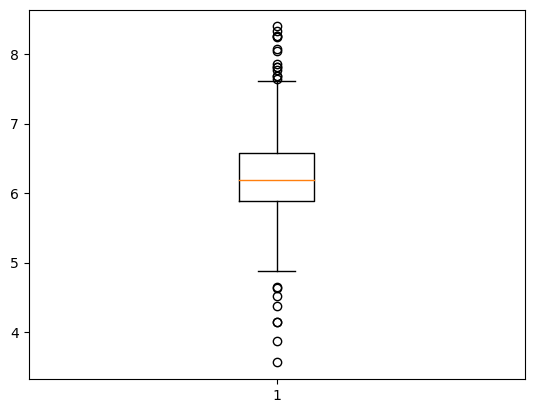

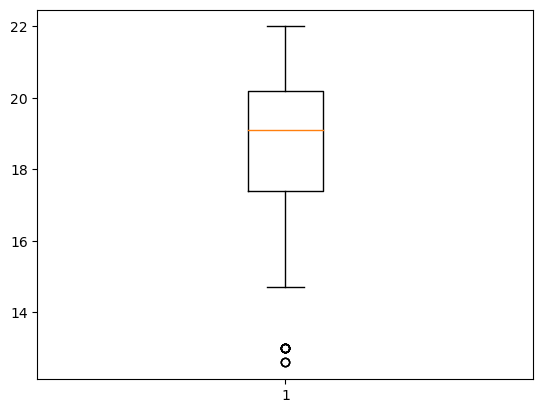

In [11]:
plt.boxplot(x1)
plt.show()
plt.boxplot(x2)
plt.show()
plt.boxplot(x3)
plt.show()

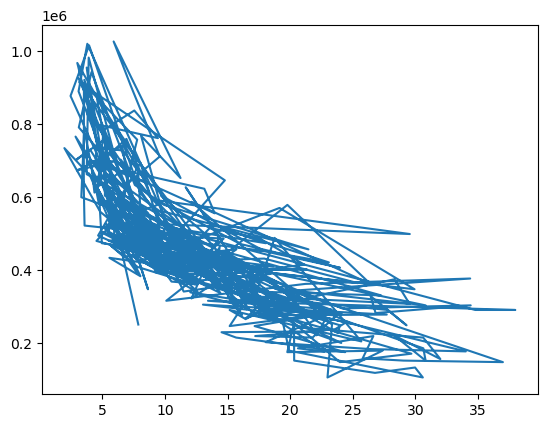

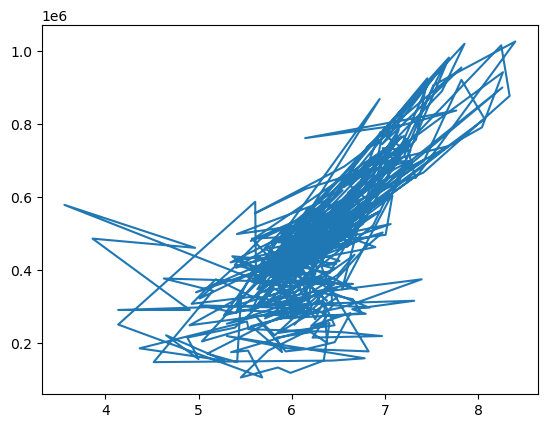

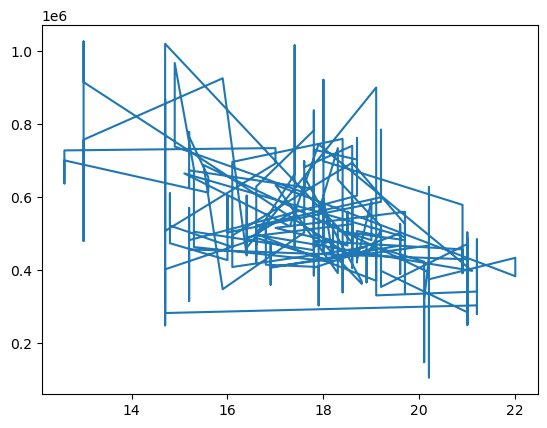

In [12]:
plt.plot(x1, y1)
plt.show()
plt.plot(x2, y1)
plt.show()
plt.plot(x3, y1)
plt.show()
# The visualization below is difficult to understand, henceof no use.

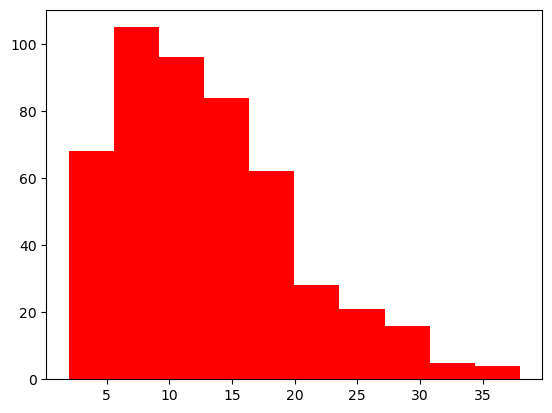

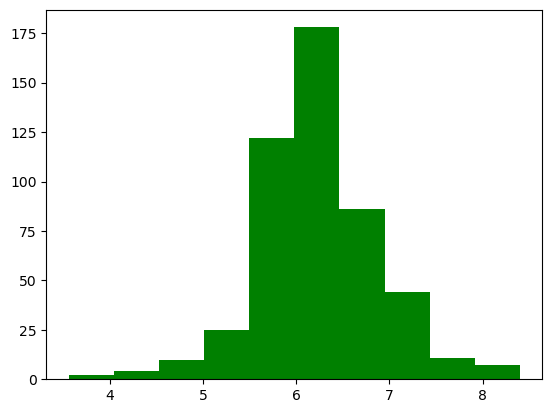

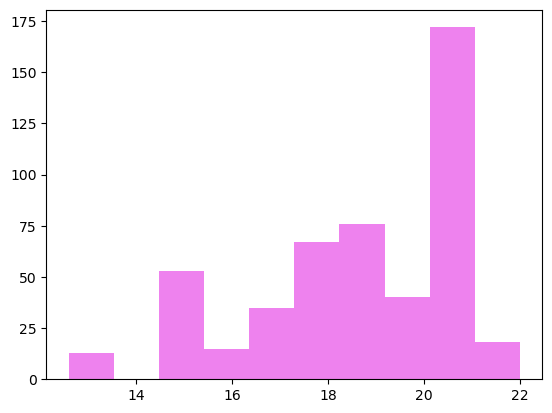

In [13]:
plt.hist(x1, color = 'red')
plt.show()
plt.hist(x2, color = 'green')
plt.show()
plt.hist(x3, color = 'violet')
plt.show()

<Axes: >

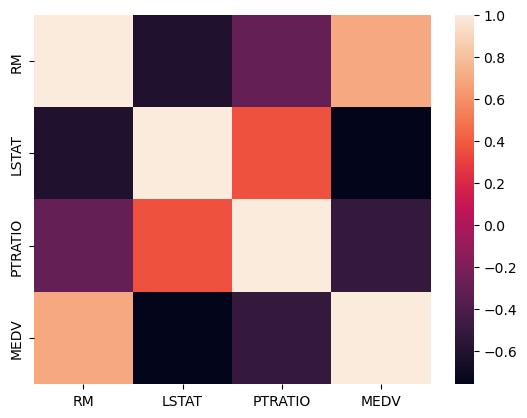

In [14]:
sns.heatmap(data = bh.corr())

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
#from sklearn.metrics import accuracy_score (Only used for classification models)
from sklearn.metrics import average_precision_score
#from sklearn.metrics import mean_absoloute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [16]:
X, y = bh[['RM', 'LSTAT','PTRATIO']], bh[['MEDV']]

In [17]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2, random_state = 7)

In [18]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [19]:
y_pred1 = model1.predict(X_test)

In [20]:
r2 = r2_score(y_test, y_pred1)
print("R2 Score of the model is ", r2)

R2 Score of the model is  0.6746664518253247


In [21]:
#Considering only one column, the r2 score is 0.4672.
#Considering two columns, the r2 score is 0.628.
#Considering two columns, the r2 score is 0.6746.

In [22]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [23]:
y_pred2 = model2.predict(X_test)

In [24]:
r2_1 = r2_score(y_test, y_pred2)
print("R2 Score of the model is ", r2_1)

R2 Score of the model is  0.5514968355123404


In [25]:
mse1 = mean_squared_error(y_test, y_pred1)
print("Mean squared error of Linear Regression is ", mse1)

Mean squared error of Linear Regression is  7687827756.830351


In [26]:
mse2 = mean_squared_error(y_test, y_pred2)
print("Mean squared error of Logistic Regression is ", mse2)

Mean squared error of Logistic Regression is  10598400000.0


In [27]:
from sklearn import svm

In [28]:
model3 = svm.SVR()

In [29]:
model3.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [30]:
y_pred3 = model3.predict(X_test)

In [31]:
mse3 = mean_squared_error(y_test, y_pred3)
print("Mean squared error of SVM is ", mse3)

Mean squared error of SVM is  24306406047.597416


In [32]:
r2_3 = r2_score(y_test, y_pred3)
print("R2 Score of the SVM is ", r2_3)

R2 Score of the SVM is  -0.028598659200391507


In [33]:
from sklearn.linear_model import BayesianRidge

In [34]:
model4 = BayesianRidge()
model4.fit(X_train, y_train)

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BayesianRidge()

In [35]:
y_pred4 = model4.predict(X_test)

In [36]:
r2_4 = r2_score(y_test, y_pred4)
print("R2 Score of the BayesianRidge is ", r2_4)

R2 Score of the BayesianRidge is  0.6756958373189377


In [37]:
from sklearn.tree import DecisionTreeRegressor

In [38]:
model5 = DecisionTreeRegressor()
model5.fit(X_train, y_train)

DecisionTreeRegressor()

In [39]:
y_pred5 = model5.predict(X_test)

In [40]:
r2_5 = r2_score(y_test, y_pred5)
print("R2 Score of the DecisionTreeRegressor is ", r2_5)

R2 Score of the DecisionTreeRegressor is  0.6406756873846107
